<a href="https://colab.research.google.com/github/KOLLA-SASANKA/PLANT_PLANT_DISEASE_DETECTION/blob/main/Plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kollashashi","key":"f05b769fbb0e0bc9227c360fa4ff1206"}'}

In [5]:
! pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 98% 646M/658M [00:03<00:00, 198MB/s]
100% 658M/658M [00:03<00:00, 210MB/s]


In [9]:
!ls -lrth

total 658M
-rw-r--r-- 1 root root 658M Oct 10  2019  plantdisease.zip
drwxr-xr-x 1 root root 4.0K Jul 24 13:22  sample_data
-rw-r--r-- 1 root root   67 Jul 26 13:15 'kaggle (1).json'


In [10]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [11]:
!ls -lrth PlantVillage/

total 2.1M
drwxr-xr-x 2 root root 108K Jul 26 13:15 Pepper__bell___Bacterial_spot
drwxr-xr-x 2 root root 136K Jul 26 13:15 Pepper__bell___healthy
drwxr-xr-x 2 root root 104K Jul 26 13:15 Potato___Early_blight
drwxr-xr-x 2 root root  96K Jul 26 13:15 Potato___Late_blight
drwxr-xr-x 2 root root  20K Jul 26 13:15 Potato___healthy
drwxr-xr-x 2 root root 232K Jul 26 13:15 Tomato_Bacterial_spot
drwxr-xr-x 2 root root 108K Jul 26 13:15 Tomato_Early_blight
drwxr-xr-x 2 root root 184K Jul 26 13:15 Tomato_Late_blight
drwxr-xr-x 2 root root  96K Jul 26 13:15 Tomato_Leaf_Mold
drwxr-xr-x 2 root root 172K Jul 26 13:15 Tomato_Septoria_leaf_spot
drwxr-xr-x 2 root root 156K Jul 26 13:15 Tomato_Spider_mites_Two_spotted_spider_mite
drwxr-xr-x 2 root root 132K Jul 26 13:16 Tomato__Target_Spot
drwxr-xr-x 2 root root 328K Jul 26 13:16 Tomato__Tomato_YellowLeaf__Curl_Virus
drwxr-xr-x 2 root root  40K Jul 26 13:16 Tomato__Tomato_mosaic_virus
drwxr-xr-x 2 root root 148K Jul 26 13:16 Tomato_healthy


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [13]:
imgs_path='PlantVillage/'
img_size=84
batch_size=64


In [14]:
class_names = os.listdir(imgs_path)
class_names

['Potato___Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Pepper__bell___healthy',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Late_blight',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato_Leaf_Mold',
 'Potato___Early_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight']

In [15]:
def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [16]:
img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

the shape of input image data is (20638, 84, 84, 3), labels shape is (20638,)


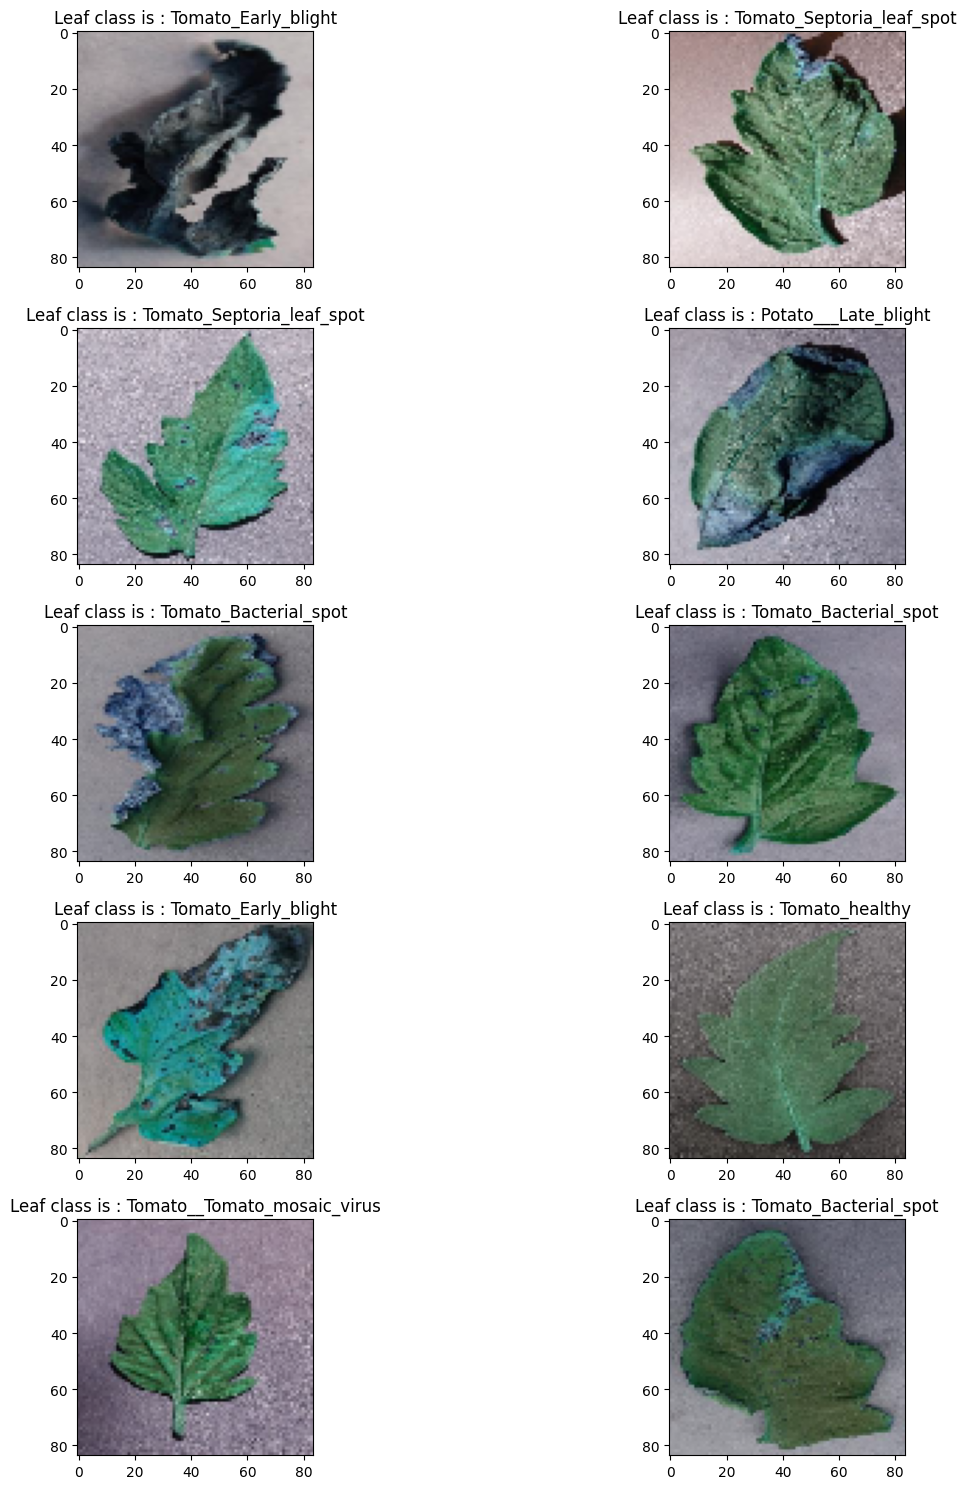

In [17]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('Leaf class is : '+str(class_names[labels[l]]))

plt.tight_layout()

In [18]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]

array([[[ 0.5921569 ,  0.4901961 ,  0.5058824 ],
        [ 0.62352943,  0.52156866,  0.5372549 ],
        [ 0.6       ,  0.49803925,  0.5137255 ],
        ...,
        [ 0.5764706 ,  0.4666667 ,  0.47450984],
        [ 0.5764706 ,  0.4666667 ,  0.47450984],
        [ 0.5764706 ,  0.4666667 ,  0.47450984]],

       [[ 0.6156863 ,  0.52156866,  0.5372549 ],
        [ 0.60784316,  0.5058824 ,  0.52156866],
        [ 0.5529412 ,  0.45098042,  0.4666667 ],
        ...,
        [ 0.58431375,  0.47450984,  0.48235297],
        [ 0.5921569 ,  0.48235297,  0.4901961 ],
        [ 0.6       ,  0.4901961 ,  0.49803925]],

       [[ 0.6       ,  0.49803925,  0.5137255 ],
        [ 0.5686275 ,  0.47450984,  0.4901961 ],
        [ 0.5921569 ,  0.4901961 ,  0.5058824 ],
        ...,
        [ 0.6       ,  0.4901961 ,  0.49803925],
        [ 0.58431375,  0.47450984,  0.48235297],
        [ 0.5686275 ,  0.4666667 ,  0.4666667 ]],

       ...,

       [[ 0.27058828,  0.16078436,  0.19215691],
        [ 0

In [19]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (16510, 84, 84, 3), X_test shape is (4128, 84, 84, 3)


In [21]:
del img_data,labels

**Implementing using VGG19**

In [22]:
from tensorflow.keras.layers import *

from tensorflow.keras.models import *

In [23]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(img_size,img_size,3), include_top=False, weights="imagenet")

for layer in vgg.layers[:19]:
        layer.trainable = False

model2=Sequential()
model2.add(vgg)
model2.add(MaxPool2D((2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 15)                7695      
                                                                 
Total params: 20032079 (76.42 MB)
Trainable params: 4727311 (18.03 MB)
Non-trainable params: 15304768 (58.38 MB)
_________________________________________________________________


In [24]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=batch_size)

Epoch 1/10
258/258 [==============================] - 31s 98ms/step - loss: 0.7721 - accuracy: 0.7468 - val_loss: 0.5139 - val_accuracy: 0.8312
Epoch 2/10
258/258 [==============================] - 22s 86ms/step - loss: 0.3276 - accuracy: 0.8904 - val_loss: 0.3909 - val_accuracy: 0.8672
Epoch 3/10
258/258 [==============================] - 23s 89ms/step - loss: 0.2049 - accuracy: 0.9276 - val_loss: 0.3466 - val_accuracy: 0.8903
Epoch 4/10
258/258 [==============================] - 23s 88ms/step - loss: 0.1404 - accuracy: 0.9495 - val_loss: 0.3359 - val_accuracy: 0.8941
Epoch 5/10
258/258 [==============================] - 22s 87ms/step - loss: 0.1005 - accuracy: 0.9644 - val_loss: 0.3060 - val_accuracy: 0.9077
Epoch 6/10
258/258 [==============================] - 22s 87ms/step - loss: 0.0871 - accuracy: 0.9685 - val_loss: 0.3175 - val_accuracy: 0.9159
Epoch 7/10
258/258 [==============================] - 23s 91ms/step - loss: 0.0620 - accuracy: 0.9771 - val_loss: 0.3672 - val_accuracy:

Text(0.5, 1.0, 'val accuracy')

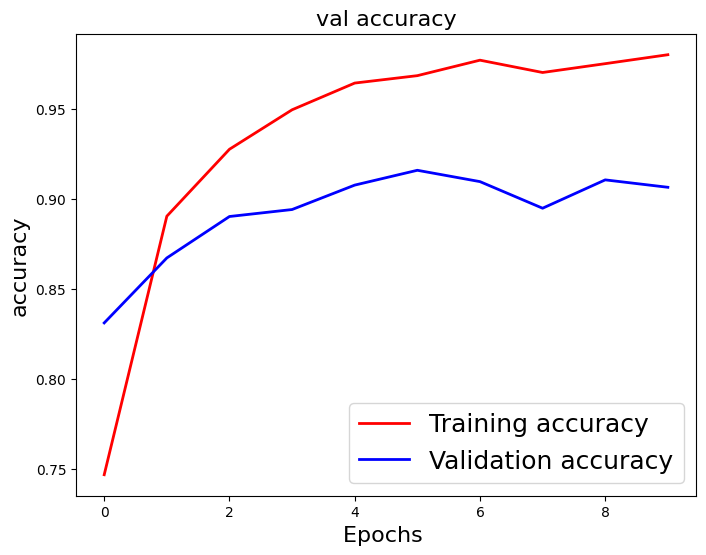

In [25]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [26]:
vgg_acc=model2.evaluate(X_test,y_test)
print('accuracy of the model is ',vgg_acc[1])

129/129 [==============================] - 4s 32ms/step - loss: 0.4379 - accuracy: 0.9065
accuracy of the model is  0.9064922332763672


**For testing the external image**

In [47]:
from google.colab import files
files.upload()

Saving test1.jpeg to test1 (1).jpeg


{'test1 (1).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\n\x07\x07\t\x07\x06\n\t\x08\t\x0b\x0b\n\x0c\x0f\x19\x10\x0f\x0e\x0e\x0f\x1e\x16\x17\x12\x19$ &%# #"(-90(*6+"#2D26;=@@@&0FKE>J9?@=\xff\xdb\x00C\x01\x0b\x0b\x0b\x0f\r\x0f\x1d\x10\x10\x1d=)#)==================================================\xff\xc0\x00\x11\x08\x00\xb4\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\x

(1, 84, 84, 3)

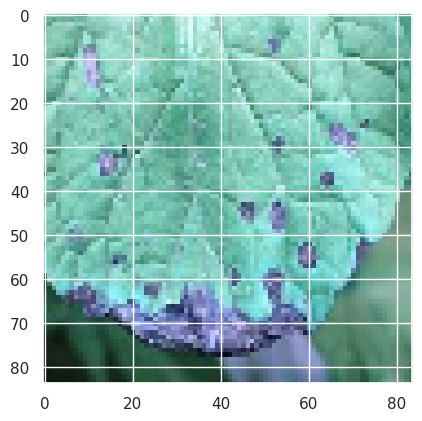

In [48]:
import cv2
#image_name='PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG'   # enter image to test
image_name='/content/test1.jpeg'
# plt.imshow(plt.imread(image_name))
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
# from google.colab.patches import cv2_imshow
# cv2_imshow(img_1)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

1/1 [==============================] - 0s 19ms/step
[[6.7270001e-15 3.2312032e-27 7.4464440e-17 8.5481500e-12 1.6151755e-16
  1.6256966e-04 2.8874818e-14 1.9578844e-16 9.9983740e-01 6.6188287e-12
  5.2176198e-20 5.7064735e-08 1.1256046e-18 2.3500901e-11 8.8415359e-14]]
output is  Tomato_healthy


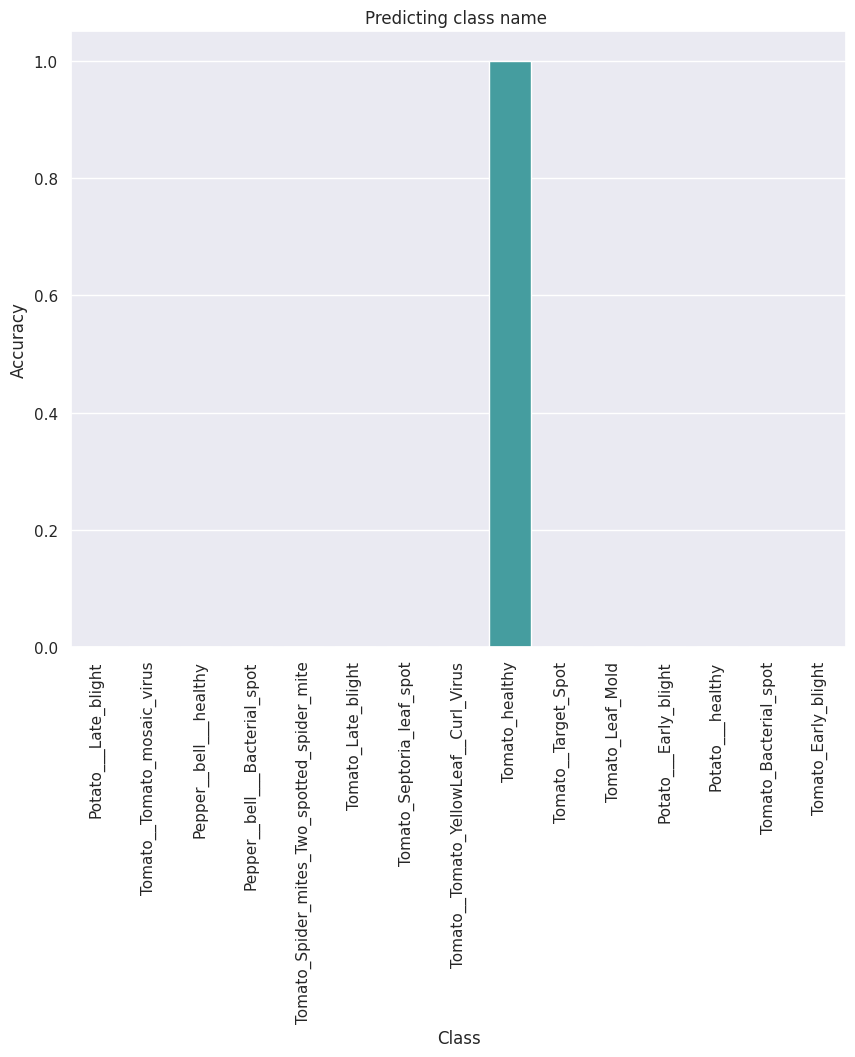

In [49]:
pred=model2.predict(x1) # for predicting class
print(pred)
# print(pred)
 # predicting probability
labels_pred=np.argmax(pred,axis=1)
# print(labels_pred)
print('output is ',class_names[labels_pred[0]])
# labels=get_labels(labels_pred)
pred_results=pd.DataFrame(data=pred,columns=class_names)
import seaborn as sns
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()